/var/folders/d8/xbjt7_d17kx9ts7pffft0f680000gn/T/ipykernel_38214/2623244867.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


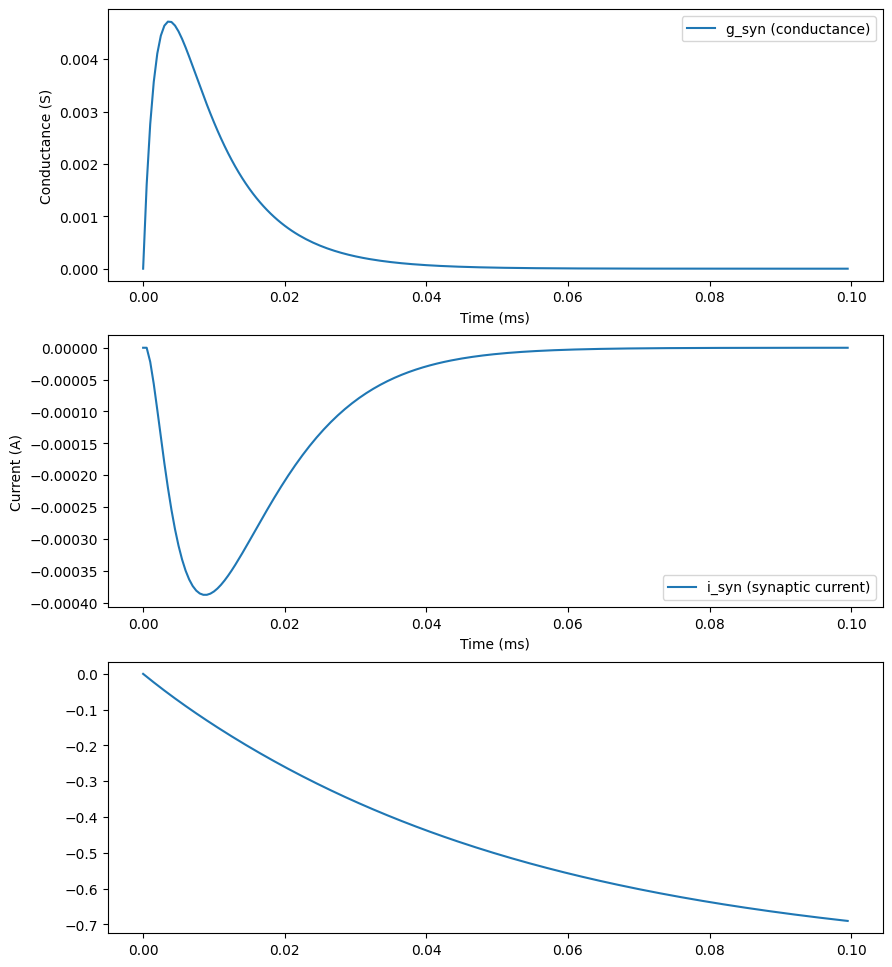

In [121]:

import numpy as np
import matplotlib.pyplot as plt
import math

# simulation parameters
tmax = 0.1                    # total seconds of simulation time
dt = 0.0005                   # time-step in seconds
gmax = 0.01                  # max capacitance in microFarads
tau_rise = 0.002              # rise time in seconds
tau_decay = 0.008             # decay time in seconds
E_syn = 0                # synaptic reversal potential in mV
E_L = -0.80                  # leak potential (also resting potential)

g_leak = 0.02                 # leak capacitance
Cm = 1e-3                    # total membrane capacitance

t_vector = np.arange(0,tmax,dt) # vector of time-points
I = np.zeros(len(t_vector))     # initializing a vector for applied current at each time-point
V = np.zeros(len(t_vector))          # initialize the membrane potential vector
g_syn = np.zeros(len(t_vector))      # initialize a vector to record spikes
V[0] = 0

def main():
    for loopiter, t in enumerate(t_vector):
        if loopiter == 0:
            continue
        else:
            g_syn[loopiter]=gmax*(-math.e**(-t/tau_rise)+math.e**(-t/tau_decay))
            I[loopiter]=g_syn[loopiter]*(V[loopiter-1]-E_syn)
            dVdt=(-I[loopiter]-g_leak*(V[loopiter-1]-E_L))/Cm
            V[loopiter]=V[loopiter-1]+dVdt*dt
    fig, ax = plt.subplots(3, 1, figsize=(10, 12))
    ax[0].plot(t_vector, g_syn, label="g_syn (conductance)")
    ax[0].set_xlabel("Time (ms)")
    ax[0].set_ylabel("Conductance (S)")
    ax[0].legend()
    ax[1].plot(t_vector, I, label="i_syn (synaptic current)")
    ax[1].set_xlabel("Time (ms)")
    ax[1].set_ylabel("Current (A)")
    ax[1].legend()
    ax[2].plot(t_vector, V, label="v (membrane potential)")
    fig.show()


if __name__=="__main__":
    main()
